In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0470-07.dvidtt.nc')
data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0300-09.dvidtt.nc')
lont = data.variables['TLON']
latt = data.variables['TLAT']

In [3]:
data.variables['dvidtt']

<class 'netCDF4._netCDF4.Variable'>
float32 dvidtt(time, nj, ni)
    _FillValue: 1e+30
    units: cm/day
    long_name: volume tendency thermo
    coordinates: TLON TLAT time
    cell_measures: area: tarea
    missing_value: 1e+30
    comment: none
    cell_methods: time: mean
    time_rep: averaged
unlimited dimensions: time
current shape = (1, 601, 3600)
filling on

In [4]:
plotvar = data.variables['dvidtt'][0,:,:]

In [8]:
plotvar.shape

(601, 3600)

In [6]:
lont = lont[:,:]
latt = latt[:,:]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: No contour levels were found within the data range.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


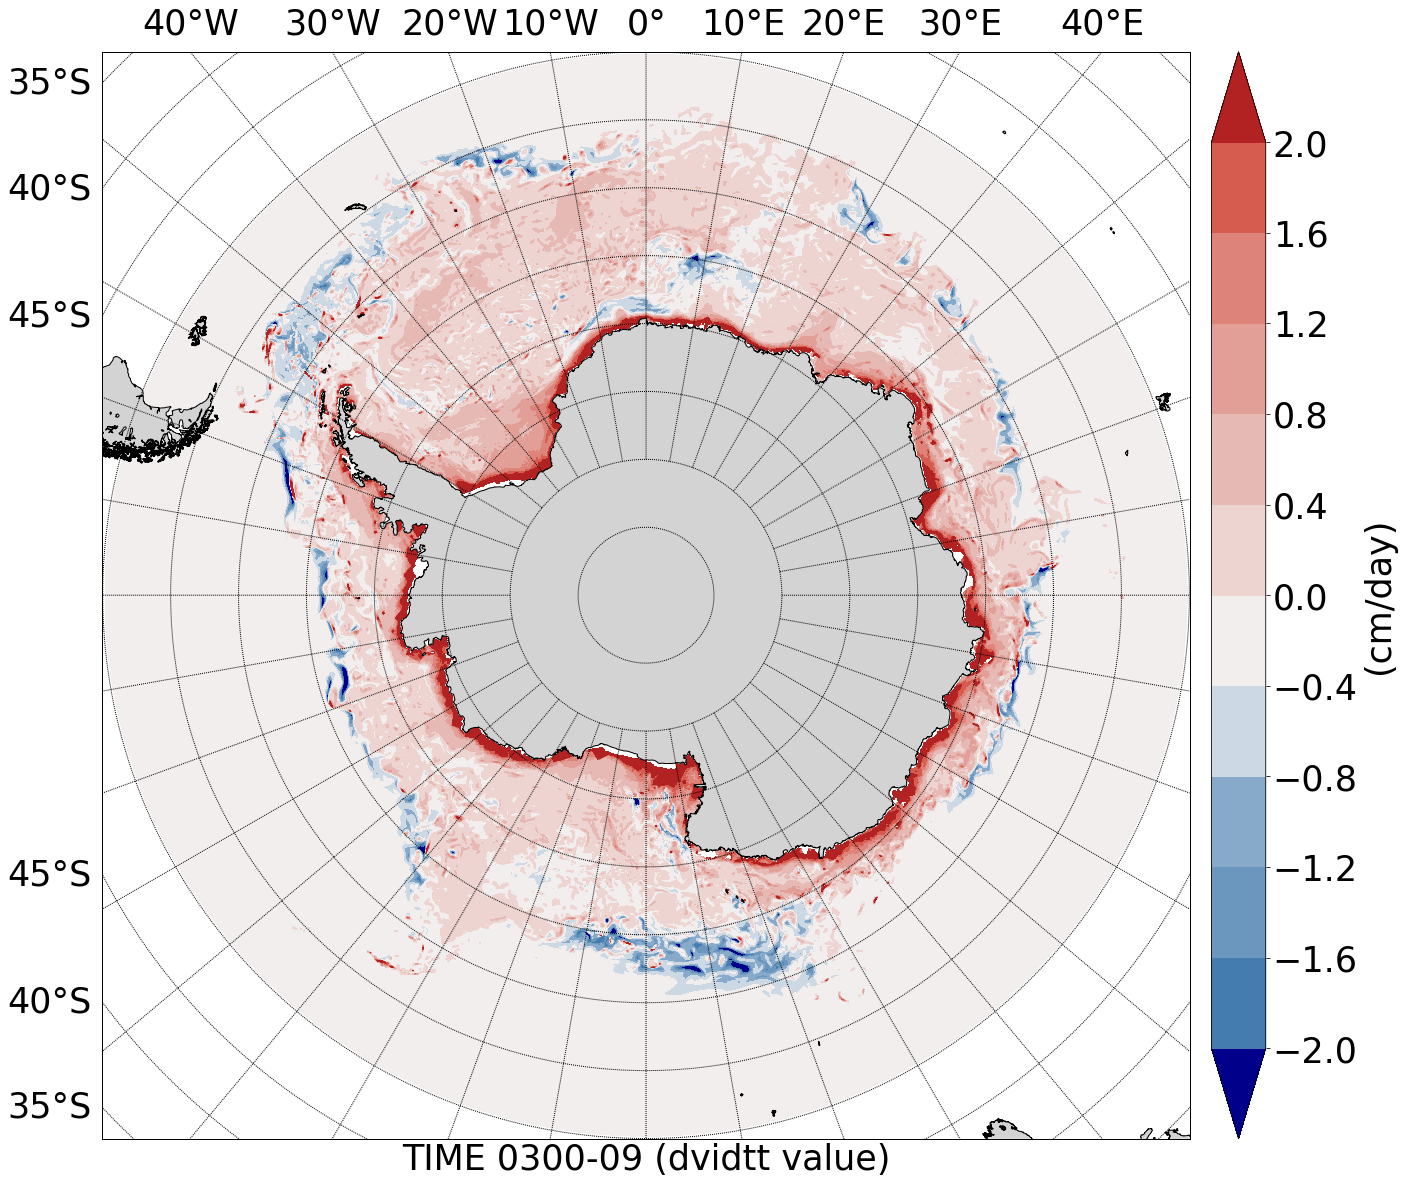

In [7]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,plotvar,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')

CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(cm/day)', **my_font)
plt.xlabel("TIME 0300-09 (dvidtt value)",**my_font)
plt.savefig("300-09.png")